# Measuring Image Similarity

The vast majority of research in the Digital Humanities has historically worked with text data. Recently, however, Digital Humanities researchers have started using new techniques to analyze image collections. This workshop discusses several of these methods, and discusses ways those methods can be used to identify similar images within large visual corpora.

## Example Projects

John Resig created [ukiyo-e](https://ukiyo-e.org/) to help researchers identify copies of Japanese woodblock prints:

<img src='images/ukiyo-e.png' style='width: 700px; margin: 20px auto'/>

Carl Stahmer's [English Broadside Ballad Archive](https://ebba.english.ucsb.edu/ballad/20933/bia) collects ballads from early modern England and analyzes the pictoral content in those ballads to identify the reuse of imagery in English printing:

<img src='images/ebba.png' style='width: 700px; margin: 20px auto'/>

Benoît Séguin's [Replica](https://profile.benoitseguin.net/2016/12/19/replica-project-status-and-roadmap.html) project identifies the reuse (and partial reuse) of visual imagery across Renaissance paintings:

<img src='images/replica.jpg' style='width: 700px; margin: 20px auto'/>

Each of these projects uses image similarity to expand our understanding of a particular dimension of visual culture.

# Getting Started

The core insight that drives a good deal of contemporary research into image similarity is the idea that images can be transformed into "vectors". A vector is a fancy word for a list of numbers. To help us think about image vectors, let's suppose we have a collection of text documents. If we were to read through those text documents and identify the set of unique words that occur within the documents, we could create an Excel spreadsheet that contained one column for each document in our corpus, and one row for each unique term in our corpus:

<img src='./images/tdm.png'>

This resulting spreadsheet is called a "Term-Document Matrix" because it tells us how many times each <i>term</i> occurs in each <i>document</i>. If we look at just the first column of the matrix, we can see the number of times each word occurs in document "D1". The list of numbers in that column can be thought of as a "vector" that represents the document. Likewise, if we look at the first <i>row</i> in the matrix above, we can see the number of times that word occurs in each document. We can think of this list of numbers as a vector that represents the word.

It turns out that vectors are highly useful ways of representing both words and documents. In fact, we can compare those vectors to find documents similar to a given document, or words similar to a given word. 

It also turns out that we can create vector representations of images. Just as we can model a document as a collection of word counts, we can essentially model an image as a collection of small pixel groupings:

<img src='./images/tdm-images.png'>

Instead of counting the number of times each word in the corpus occurs, we can essentially count the number of times distinct pixel patterns occur in an image, and those counts give us a vector that represents the content of that image. We can think of this as a "Feature-Image Matrix", as it indicates the presence or absence of each feature within each image. Just as a single column in our Term-Document Matrix represented a <i>document</i> as a vector, a single column in our Feature-Image Matrix represents a single image as a vector.

Let's see how we can create these image vectors below.

# Vectorizing Images

For our prototyping work, let's use a sample image from the [Grantham Bain Collection](https://www.loc.gov/pictures/collection/ggbain/) within the Library of Congress.

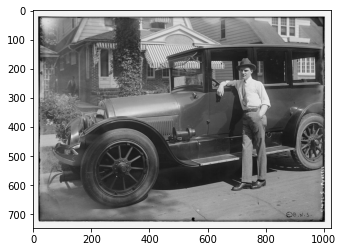

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# import some helper code
import helpers

# specify the path to an image
image_path = 'data/45787132795.jpg'

# display the image
helpers.display_image(image_path)

The code above specifies the path to this image file, then loads that image and displays it so we have a sense of what we're working with. From there, we can obtain a vector representation of our image using a little helper function:

In [3]:
# obtain a vector representation of the image at `image_path`
vector = helpers.get_inception_vector(image_path)

# display the contents of the vector
vector

array([2.54689294e-05, 2.13180301e-05, 1.08008662e-05, 2.58886885e-05,
       2.06720779e-05, 2.86087088e-05, 3.07458395e-05, 1.26312079e-04,
       6.05060995e-05, 9.95987502e-05, 2.17410416e-05, 4.07707885e-05,
       3.99807250e-05, 3.15974212e-05, 4.24808786e-05, 8.54972750e-05,
       1.80070510e-05, 4.38734023e-05, 2.82790206e-05, 4.06561740e-05,
       8.04702140e-05, 1.73610970e-05, 3.73497460e-05, 7.20694952e-05,
       3.31626361e-05, 3.77280412e-05, 2.86235008e-05, 3.96263749e-05,
       3.90952664e-05, 3.53957366e-05, 2.92758341e-05, 1.11545203e-04,
       4.16955518e-05, 7.50886466e-05, 5.71685196e-05, 3.45029985e-05,
       1.71391930e-05, 4.31394838e-05, 7.97164685e-05, 1.65994134e-05,
       4.18820237e-05, 3.93114751e-05, 4.75733759e-05, 1.93750184e-05,
       8.38411215e-05, 5.31607366e-05, 5.50148288e-05, 2.64948394e-05,
       4.47003440e-05, 2.08364763e-05, 1.95818993e-05, 1.16446563e-05,
       3.43952706e-05, 4.86952777e-05, 2.88155243e-05, 4.82400355e-05,
      

As we can see, `helpers.get_inception_vector()` takes an image path as input and returns a list of numbers, or vector, as output. This vector represents the content contained in the image, just as the vector in a Term-Document Matrix or Feature-Image Matrix above represented the content within a single document or image (respectively). 

The vector returned by `helpers.get_inception_vector()` is special, however, because the components within that vector correspond to text labels for our image. To retrieve those text labels, we can use another helper function:

In [4]:
# get the labels for the top 5 vector components
labels = helpers.get_inception_vector_labels(vector)

# display the label information
labels

[('n03777568', 'Model_T', 0.93366945),
 ('n02974003', 'car_wheel', 0.013832554),
 ('n03345487', 'fire_engine', 0.0029073453),
 ('n04461696', 'tow_truck', 0.0026405933),
 ('n03100240', 'convertible', 0.0017011623)]

These labels tell us the content that our vectorization algorithm believes is contained within our specified image. Specifically, the algorithm has predicted with 93% confidence that our input image contains a Model T. It has also predicted with 1.3% confidence that the image contains a car wheel, .2% confidence that the image contains a fire engine, and so on. All in all, the model seems to have done a pretty good job of identifying the content within our image!

## Comparing Vectors

In our work above, we saw how to create a vector (or list of numbers) that represent the content of an image. If we compare two of those vectors, we can measure the similarity of the images they represent. Let's see how to achieve this form of comparison.

Let's start by generating vectors for two distinct images. We'll also display those images so we know what they look like:

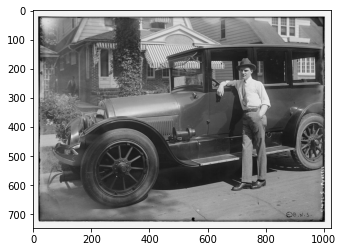

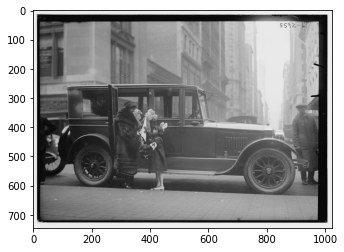

In [6]:
path_a = 'data/45787132795.jpg'
path_b = 'data/48607282742.jpg'

helpers.display_image(path_a)
helpers.display_image(path_b)

vector_a = helpers.get_inception_vector(path_a)
vector_b = helpers.get_inception_vector(path_b)

Great! We can see both images contain automobiles (perhaps the Model T?), so we expect our image vectors to be similar. We can quantify their similarity by computing the **Euclidean Distance** between the vectors. Here is the formula for Euclidean Distance:

<img src='./images/euclidean-distance.svg' />

This equation might look intimidating at first sight, but if we take it apart a little we'll see it just involves some basic operations that you already know. First things first, the left-hand side of this equation says that we are computing the distance $d$ between $p$ and $q$, both of which are lists of numbers. 

To compute the distance between $p$ and $q$, we can plug them into the right-hand side of the equation. Let's start with the most foreign symbol in that equation:

<center>
<h2>
$\sum\limits_{i=1}^{n}$
</h2>
</center>

The large symbol above is the capitalized Greek letter "sigma". Taken along with the text below and above the sigma, this symbol says "compute the sum for all values of $i$ from 1 to $n$". We can think of the sigma symbol as a for loop that iterates over different values of $i$. Each of those values of $i$ is plugged into the content to the right of the sigma and evaluated; then the sigma symbol takes the sum of all thoes values. 

To figure out what $i$ means within the context of this formula, we have to look to the right of the Sigma symbol. There we see $(q_i - p_i)^2$. In this context, the full Sigma notation means:

> Find the difference between the first number in $p$ and the first number in $q$ and square that difference. Next find the difference betwen the second number in $p$ and the second number in $q$ and square that difference. Keep operating in this way until you have processed each number in $p$ and $q$, and when you have computed all of those squared differences, take their sum. 

Once we've computed that big sum, we simply take its square root, and that gives us the Euclidean distance between our two vectors!

Let's practice computing the Euclidean distance between the red and blue vectors below, each of which contains just two numbers:

<img src='./images/coordinates.jpg'>

Here we have a red vector [0, 0] and a blue vector [6, 8]. We can plug these vectors into our Euclidean distance formula as follows:

\begin{align*}
d(blue, red) &= \sqrt{\sum\limits_{i=1}^{n}{(blue_i - red_i)^2}} \\
&= \sqrt{(6-0)^2 + (8-0)^2} \\
&= \sqrt{100} \\
&= 10 \\
\end{align*}

In Python, we can compute the Euclidean distance between our red and blue vectors as follows:

In [23]:
def euclidean_distance(p, q):
  # create a counter that will store the summed distance between our vectors
  distance = 0

  # iterate over each position in the vectors
  for idx, _ in enumerate(p):

    # find the difference between the current position within the blue and red vectors
    difference = p[idx] - q[idx]

    # square that difference
    squared_distance = difference ** 2

    # add the squared difference to our aggregate distance value
    distance += squared_distance

  # finally take the square root of the aggregate distance
  return distance ** (1/2)

# compute the distance betwen the red and blue vectors
print(euclidean_distance([0, 0], [6, 8]))

10.0


That's all it takes to measure the similarity between vectors in Python! The greater the <i>distance</i> between our two vectors, the less similar they are. Conversely, the smaller the distance between two vectors, the more similar they are.

Now let's return to our image pair from above, and this time let's use our Euclidean distance function to measure the distance between those images:

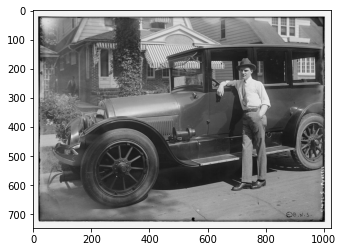

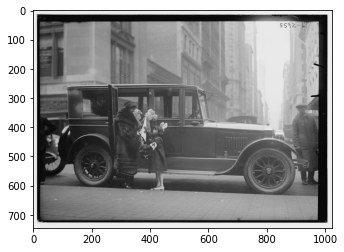

0.024137925246639744

In [13]:
path_a = 'data/45787132795.jpg'
path_b = 'data/48607282742.jpg'

helpers.display_image(path_a)
helpers.display_image(path_b)

vector_a = helpers.get_inception_vector(path_a)
vector_b = helpers.get_inception_vector(path_b)

euclidean_distance(vector_a, vector_b)

The distance between the image vectors for these two car photos is rather small. This makes sense, because the images are conceptually quite similar. 

Now that we know how to measure the distance between two images, let's compare each image in `./data` to each other image in the folder, and display those image pairs that have small Euclidean distance between them. As a first step in this direction, we'll create a dictionary that maps the path to an image to the vector representation of that image:

In [25]:
import helpers
import glob

# create a dictionary that will map each image path to the image's vector
path_to_vector = {}

# vectorize each input image
for path in glob.glob('data/*.jpg'):
  
  # map this file's key to the image vector
  path_to_vector[path] = helpers.get_inception_vector(path)
  
# display the path to vector mapping
path_to_vector

{'data/18552236708.jpg': array([9.37285586e-06, 1.44626292e-05, 3.54805670e-05, 8.80509688e-05,
        1.86898305e-05, 8.09223729e-06, 1.08307386e-05, 2.35634016e-05,
        9.50312187e-06, 1.38272771e-05, 2.28015015e-05, 8.20858713e-06,
        1.76301401e-05, 2.28798745e-05, 1.23229593e-05, 2.35853440e-05,
        5.23230337e-05, 3.03485394e-05, 2.02046904e-05, 1.67580256e-05,
        6.37518588e-06, 3.53086352e-06, 2.16989815e-06, 2.23144452e-05,
        2.59232888e-06, 1.80405677e-05, 4.78491602e-05, 1.33696612e-05,
        2.97828683e-05, 9.91866636e-06, 1.73744302e-05, 1.22011797e-05,
        2.94155707e-05, 2.01008679e-05, 1.02186750e-05, 1.90362025e-05,
        3.16527658e-05, 4.13675625e-05, 4.02537407e-05, 2.18054738e-05,
        1.66553236e-05, 3.65767228e-05, 1.78714690e-05, 1.46733701e-05,
        2.73227906e-05, 1.73645913e-05, 4.94153937e-05, 3.04291952e-05,
        1.20984614e-05, 8.84646215e-06, 7.05460843e-06, 1.26315035e-05,
        1.24779499e-05, 5.94149969e-06, 

The cell above will take a moment to run. When it's done, we'll have a dictionary in which each key represents the path to an image, and each value represents the vector for the given image.

The next step is to identify all unique combinations of images paths. We can achieve this goal with the following:

In [26]:
from itertools import combinations

# get the list of image paths
image_paths = path_to_vector.keys()

# find all possible two-element combinations of image paths
image_pairs = list(combinations(image_paths, 2))

image_pairs

[('data/18552236708.jpg', 'data/26829302023.jpg'),
 ('data/18552236708.jpg', 'data/8902693639.jpg'),
 ('data/18552236708.jpg', 'data/24116162128.jpg'),
 ('data/18552236708.jpg', 'data/3490801013.jpg'),
 ('data/18552236708.jpg', 'data/48607282742.jpg'),
 ('data/18552236708.jpg', 'data/26171577760.jpg'),
 ('data/18552236708.jpg', 'data/9838267944.jpg'),
 ('data/18552236708.jpg', 'data/45787132795.jpg'),
 ('data/18552236708.jpg', 'data/6399918925.jpg'),
 ('data/18552236708.jpg', 'data/6399918573.jpg'),
 ('data/18552236708.jpg', 'data/43478054635.jpg'),
 ('data/18552236708.jpg', 'data/14119109829.jpg'),
 ('data/18552236708.jpg', 'data/9100831794.jpg'),
 ('data/18552236708.jpg', 'data/19171465342.jpg'),
 ('data/18552236708.jpg', 'data/2162669929.jpg'),
 ('data/18552236708.jpg', 'data/4586277497.jpg'),
 ('data/18552236708.jpg', 'data/33621457365.jpg'),
 ('data/18552236708.jpg', 'data/5693556037.jpg'),
 ('data/18552236708.jpg', 'data/8599837423.jpg'),
 ('data/18552236708.jpg', 'data/216352931

Now that we have all of our image combinations identified, we can iterate over each pair of images, retrieve the vector for each from our `path_to_vector` dictionary, then measure the distance between them. If the distance between two images is quite low, we'll display those images, the path to each, and the distance between them:

------ data/18552236708.jpg data/21245806255.jpg 0.09499721861623482 ------


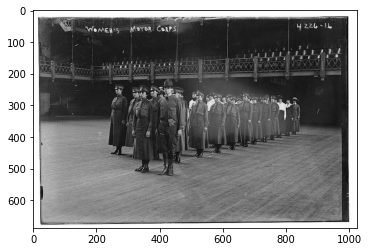

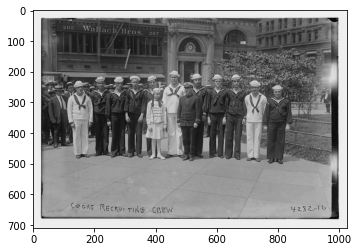

------ data/8902693639.jpg data/9838267944.jpg 0.04601809789718425 ------


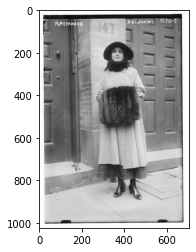

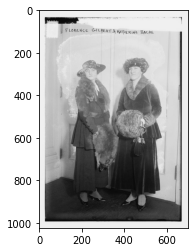

------ data/24116162128.jpg data/30137698993.jpg 0.0936672223592436 ------


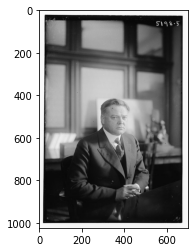

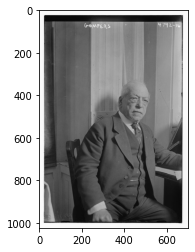

------ data/3490801013.jpg data/24432756612.jpg 0.05678227409885033 ------


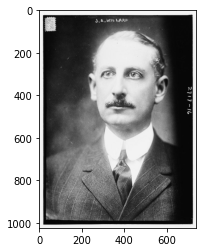

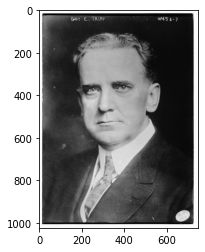

------ data/48607282742.jpg data/45787132795.jpg 0.024137925246639744 ------


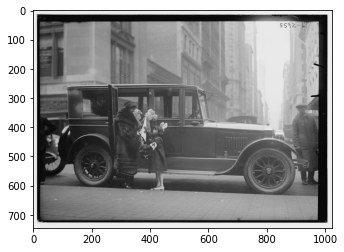

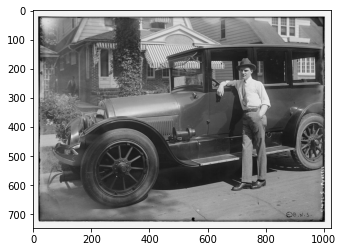

------ data/43478054635.jpg data/15837169953.jpg 0.040853747013789354 ------


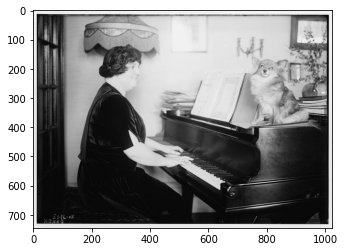

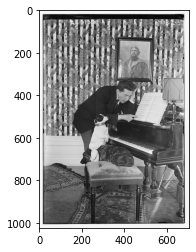

------ data/9100831794.jpg data/11733051925.jpg 0.012874460906963736 ------


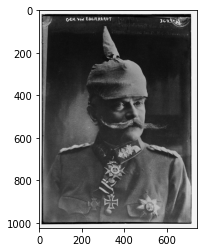

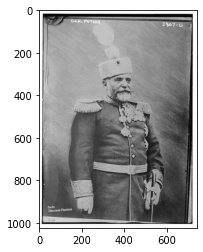

------ data/19171465342.jpg data/27510115381.jpg 0.02656265698067686 ------


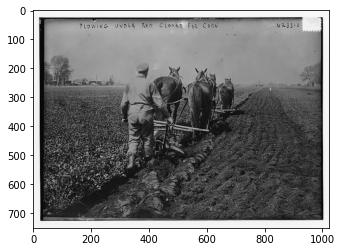

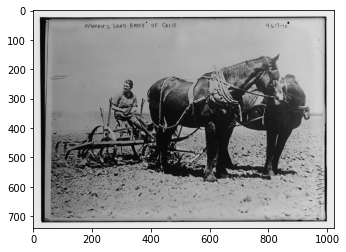

------ data/4586277497.jpg data/3681840093.jpg 0.061123478958248365 ------


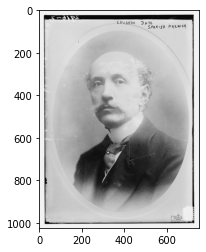

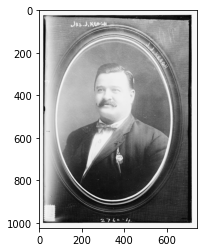

------ data/33621457365.jpg data/2163529314.jpg 0.011188199230017093 ------


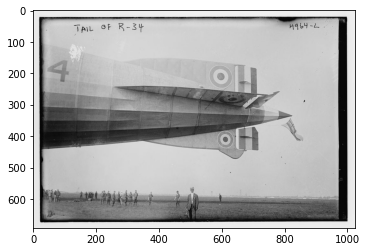

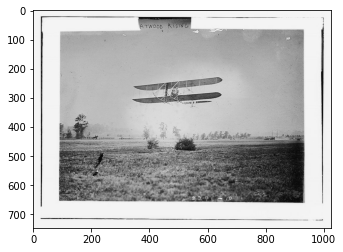

------ data/33621457365.jpg data/14936361113.jpg 0.007149299621624391 ------


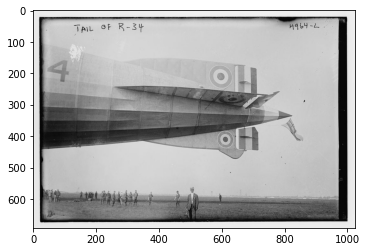

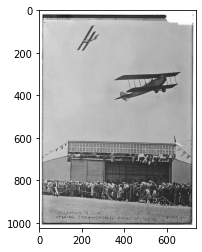

------ data/5693556037.jpg data/3953329776.jpg 0.031669033030668765 ------


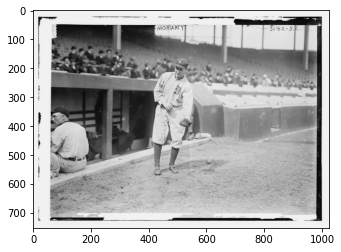

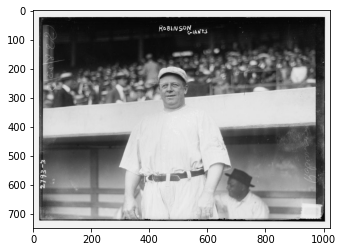

------ data/2163529314.jpg data/14936361113.jpg 0.004869949228155194 ------


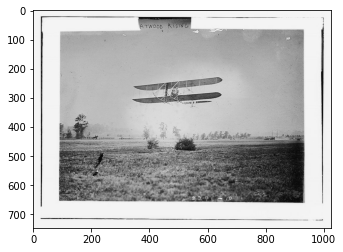

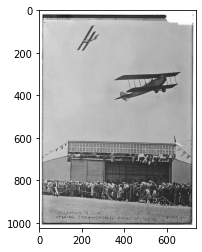

------ data/8252715302.jpg data/12990392835.jpg 0.05189053750078854 ------


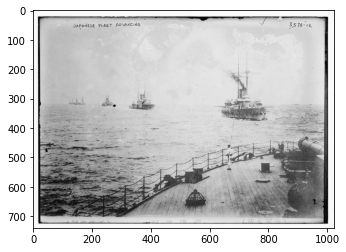

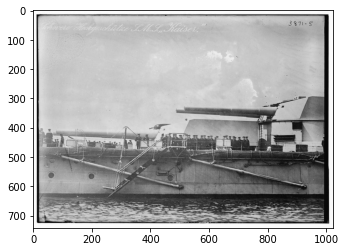

In [27]:
# iterate over each pair of image paths
for a, b in image_pairs:
  
  # pull out the vectors for the two images
  vector_a = path_to_vector[a]
  vector_b = path_to_vector[b]
  
  # compute the distance between the vectors
  distance = euclidean_distance(vector_a, vector_b)
  
  # if the distance between the vectors is small, the images are similar, so display each
  if distance < 0.2:
    
    # print the two image paths, their distance, and the images themselves
    print('------', a, b, distance, '------')
    helpers.display_image(a)
    helpers.display_image(b)

It works! Using the method above, we can identify pairs of simliar images within our image collection. 

## Dimension Reduction

In some cases, the method aboved is perfectly sufficient for identifying similar images within a corpus. In other cases, however, it can be helpful to see all of the images within a collection displayed at once, with similar images positioned near one another. This latter approach lets us see much more information at a glance. To achieve this effect, we need to understand a little about "dimension reduction".

Dimension reduction is the process of reducing the number of numeric values required to represent something. Our image vectors above, for example, each contain 1000 values. If we could transform those vectors so each contained only two values, however, we could plot our images on a standard two-dimensional (Cartesian) graph. We'll perform exactly this dimension reduction below.

One popular way to reduce the dimensionality of a dataset is to use a technique called [**Principal Component Analysis**](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA tries to find a lower dimensional representation of a dataset by projecting that dataset down into a smaller dimensional space in a way that minimizes loss of information.

To get an intuition about PCA, suppose you have points in two dimensions, and you wish to reduce the dimensionality of your dataset to a single dimension. To do so, you could find the center of the points then create a line $L$ with a random orientation that passes through that center. One can then project each point onto $L$ such that an imaginary line between the point and $L$ form a right angle. Within this \"projection\", each 2D point can be represented with just its position along the 1D $L$, effectively giving us a 1D representation of the point's position in its original space. We can then take the sum of the the lengths of the red lines. The smaller that sum is, the less our model has distorted the point positions. That is to say, the smaller the total lengths of the red lines, the better the "fit" is between our data in its original dimensionality and our data in the lower dimensionality. 

Furthermore, we can use the difference between the largest and smallest values of points projected onto $L$ as a measure of the amount of \"variance\" or \"spread\" within the data captured in $L$&mdash;the greater this spread, the greater the amount of \"signal\" from the original dataset is represented in the projection.

<img src='./images/pca.gif' />

We can use the same approach to reduce our 1000-dimensional image vectors down to 2 dimensions. To prepare for this task, let's generate a list of our image paths, and a list of our vectors:

In [ ]:
paths, vectors = zip(*path_to_vector.items())

Next we'll import the UMAP library and use that library to project our images down to two dimensions:

In [34]:
import umap

embedding = umap.UMAP(n_neighbors=10).fit_transform(vectors)

Great! `embedding` is now a matrix that represents each of our images in just two dimensions. From here, we can use the two-dimensional coordinates in `embedding` to plot our images:

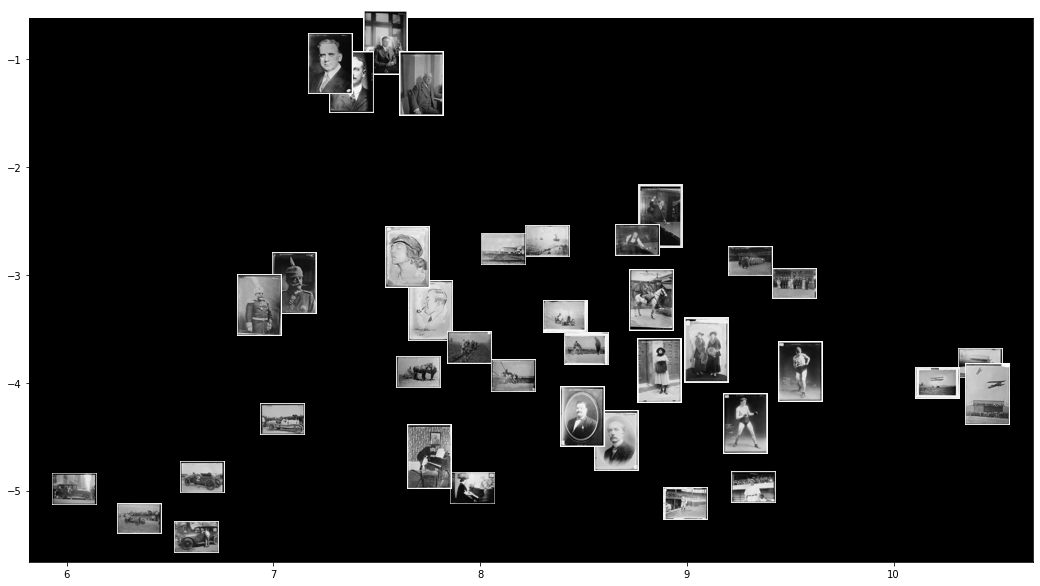

In [40]:
helpers.plot_images(paths, embedding)

Awesome! With just a few lines of code, we've been able to process a modest image collection and visualize the similarity between images within that collection at a glance.

## PixPlot

In the sections above, we saw how we can vectorize a collection of images, project those image vectors down to two dimensions, then visualize the resulting scatterplot. If your image collection is sufficiently large, however, the visualization strategy we used above won't work very well. To help researchers who want to analyze visual similarity in large image collections, the DHLab created PixPlot, a software package that can be used to visualize image similarity in large image collections. In case you want to analyze a more realistic image corpus, let's see how we can use PixPlot in the steps below.

To get started, let's download a collection of 1000 images so we have more data to work with:

In [3]:
import image_datasets

# display the available image collections
print(' * available collections:', image_datasets.list())

# download the content within one of those image collections
image_datasets.oslomini.download()

 * available collections: ['bain', 'fsaowi_ct', 'oslo', 'oslomini', 'si_open_access']
 * downloading oslomini metadata from http://pixplot.yale.edu/datasets/oslomini/metadata.csv
 * downloading oslomini images from http://pixplot.yale.edu/datasets/oslomini/photos.tar


We now have a folder named `datasets` that contains a subfolder named `oslomini`. Inside of `oslomini` we have a subfolder named `images` with several images we can analyze and plot. From there, we can just use the `pixplot` command to build our plot:

In [ ]:
!pixplot --images "datasets/oslomini/images/*.jpg" --metadata "datasets/oslomini/metadata/metadata.csv"

That command will take some time to process the image collection. Once it's done, we can upload the generated visualization to a web server for viewing with the following command:

In [ ]:
import helpers

helpers.upload_output()

That's all it takes to analyze the similarity of images, even in massive image collections!

## Next Steps

We've covered a lot of ground in this notebook! If you'd like to study some of the material we've discussed a bit more deeply, the following resources may be helpful:

#### Neural Networks

The algorithm we used above to create vector representations of our images was a convolutional neural network. If you'd like to learn more about convolutional neural networks, we recommend [Luis Serrano's introduction to the subject](https://www.youtube.com/watch?v=2-Ol7ZB0MmU), which is perfectly suited to those with no prior experience with machine learning. If you'd like to understand the mathematics behind neural networks, we recommend the [tutorial series created by Welch Labs](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU), which will help break down the mathematics into small steps you can follow.

#### Dimension Reduction

If you'd like to learn more about the dimension reduction technique we discussed above, we recommend [Google PAIR's interactive essay on UMAP](https://pair-code.github.io/understanding-umap/), the algorithm we used to project our vectors down to two dimensions.